Questions are from "Doing Math with Python" by Amit Saha

# Imports

In [1]:
import pandas 
import numpy
import matplotlib.pyplot as plt
import math
from sympy import Poly,Symbol,solve_poly_inequality,sympify,solve_rational_inequalities,solve_univariate_inequality,sin
import random

# Problem 1
Programming Challenge 1 page 22, Even-Odd Vending Machine

In [2]:
def even_odd_machine(n):
    if n % 2 == 0:
        return 'even'
    else:
        return 'odd'

In [3]:
print(even_odd_machine(3))
print(even_odd_machine(4))

odd
even


# Problem 2
Programming Challenge 2 page 55, Exploring a Quadratic Function Visually

In [4]:
def plot_quadratic(x_values):
    y_values = [x**2+2*x+1 for x in x_values]
    plt.figure(figsize=(10,8))
    plt.scatter(x_values, y_values, label='Points')
    plt.plot(x_values, y_values, label='Graph')
    plt.xlabel('x', fontweight='bold')
    plt.ylabel('y', fontweight='bold')
    plt.title('Graph of x^2+2x+1', fontweight='bold')
    plt.legend()
    plt.show()

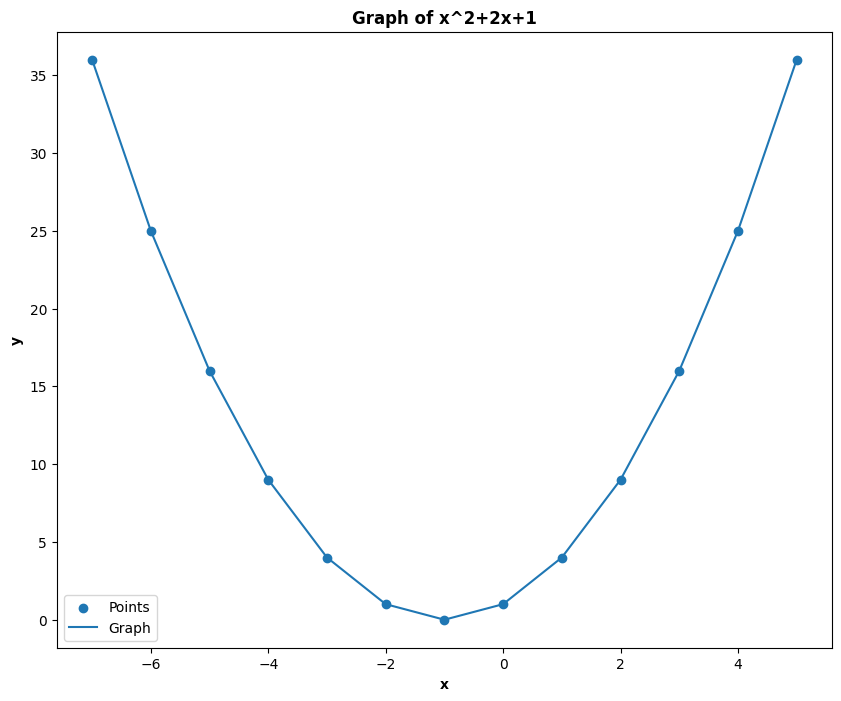

In [5]:
x_values = [-7, -6, -5,-4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
plot_quadratic(x_values)
# The graph below is a quadratic, and is thus non-linear

# Problem 3
Programming Challenge 2 page 89, Statistics Calculator

In [6]:
def mean(data):
    return sum(data)/len(data)

def median(data):
    split = int(len(data) / 2)
    if even_odd_machine(len(data)) == 'even':
        return (data[split] + data[split-1]) / 2
    else:
        return data[split]

def mode(data):
    counts = {}
    for n in data:
        if n not in counts:
            counts[n] = 1
        else:
            counts[n] += 1

    return max(counts, key=counts.get)

def variance(data):
    avg = mean(data)
    sum_of_square_diffs = 0
    for n in data:
        sum_of_square_diffs += (n - avg)**2
    return sum_of_square_diffs / len(data)

def std_dev(data):
    return math.sqrt(variance(data))

def read_txt_file(filename):
    data_list = []
    with open(filename) as f:
        for line in f:
            data_list.append(int(line))
    return data_list

def stats_calculator(filename):
    data = read_txt_file(filename)
    print('Data: %s' % str(data))
    print('Mean: %f' % mean(data))
    print('Median: %f' % median(data))
    print('Mode: %f' % median(data))
    print('Variance: %f' % variance(data))
    print('Standard Deviation: %f' % std_dev(data))

In [7]:
stats_calculator('sample_data.txt')

Data: [2, 2, 3, 5, 5, 5, 9, 12, 12, 15]
Mean: 7.000000
Median: 5.000000
Mode: 5.000000
Variance: 19.600000
Standard Deviation: 4.427189


# Problem 4
Programming Challenge 4 page 117, Solving Single-Variable Inequalities

In [8]:
def determine_type(expr):
    '''Returns solution to an inequality given a string representation of said
    inequality. The inequality must be so that the right hand side is always 0.
    '''
    if expr.is_polynomial() is True:
        return 'polynomial'
    elif expr.is_rational_function() is True:
        return 'rational'
    else:
        return 'univariate'

def isolve(ineq_str):
    x = Symbol('x')
    ineq_obj = sympify(ineq_str)
    lhs = ineq_obj.lhs
    rel = ineq_obj.rel_op

    eqn_type = determine_type(lhs)
    if eqn_type == 'polynomial':
        p = Poly(lhs, x)
        return solve_poly_inequality(p, rel)
    elif eqn_type == 'rational':
        numer,denom = lhs.as_numer_denom()
        p1 = Poly(numer)
        p2 = Poly(denom)
        return solve_rational_inequalities([[((p1, p2), rel)]])
    else:
        return solve_univariate_inequality(ineq_obj,x,relational=False)

In [9]:
print(isolve('-x**2+4 < 0'))
print(isolve('(x-1)/(x+2) > 0'))
print(isolve('sin(x)-0.6 > 0'))

[Interval.open(-oo, -2), Interval.open(2, oo)]
Union(Interval.open(-oo, -2), Interval.open(1, oo))
Interval.open(0.643501108793284, -0.643501108793284 + pi)


# Problem 5 
Programming Challenge 2 page 143, Law of Large Numbers

In [10]:
def dice_ev_calculator(trials):
    total = 0 
    for i in range(trials):
        total += random.randint(1,6)
    return total / trials

In [11]:
trial_list = [100, 1000, 10000, 100000, 500000]

print('Expected value: 3.5')
for trials in trial_list:
    print('%d Trials: %f' % (trials, dice_ev_calculator(trials)))

# as expected, the mean value gets closer to the true EV w/ more trials

Expected value: 3.5
100 Trials: 3.470000
1000 Trials: 3.601000
10000 Trials: 3.459600
100000 Trials: 3.495510
500000 Trials: 3.499906


In [13]:
import scipy

/Users/williamjasmine/opt/anaconda3/envs/datatools/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
